In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from hopfield import read_letters_from_file, select_random_patterns, hopfield_model, add_noise, retrieve_pattern,retrieve_pattern_dynamic 

def plot_pattern_dynamic(pattern, ax, title, energy=None, epoch=None):
    ax.imshow(pattern, cmap='binary', vmin=-1, vmax=1)
    if epoch is not None:
        if energy is not None:
            ax.set_title(f'{title} (Epoch {epoch}, Energy: {energy:.2f})')
        else:
            if epoch == 0:
                ax.set_title(f'{title} (Noisy Letter)')
            else:
                ax.set_title(f'{title} (Epoch {epoch})')
    else:
        ax.set_title(title)
    ax.axis('off')
    

def test_hopfield_on_different_letter_number(patterns, noise_percentage, max_epochs, n):
    selected_patterns = select_random_patterns(patterns, n)
    weight_matrix = hopfield_model(selected_patterns)
    results = {}

    for letter, original_pattern in selected_patterns.items():
        noisy_pattern = add_noise(original_pattern, noise_percentage)
        retrieved_pattern,energy = retrieve_pattern(weight_matrix, noisy_pattern, max_epochs, plot = False)
        if np.array_equal(retrieved_pattern, original_pattern):
            results[letter] = True
        else:
            results[letter] = False

    return results



noise_percentage = 0.2
patterns= read_letters_from_file('letters.txt')
patterns_big = read_letters_from_file('letters_big_18x27.txt')
num_letters = 4
max_epochs = 10

selected_patterns = select_random_patterns(patterns, num_letters)

noisy_patterns = {letter: add_noise(pattern, noise_percentage) for letter, pattern in selected_patterns.items()}

weight_matrix = hopfield_model(selected_patterns)

for letter, noisy_pattern in noisy_patterns.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the original letter on the left subplot
    plot_pattern_dynamic(selected_patterns[letter], ax1, f'Original {letter}')
    
    histories, energies = retrieve_pattern_dynamic(weight_matrix, noisy_pattern, max_epochs)
    max_frames = len(histories)

    def update(frame):
        ax2.clear()
        pattern = histories[frame]
        energy = energies[frame]
        plot_pattern_dynamic(pattern, ax2, f'{letter}', energy, frame)

    ani = animation.FuncAnimation(fig, update, frames=max_frames, repeat=False)
    ani.save(f'{letter}-Exp1_animation.gif', writer='pillow', fps=1)
    plt.close(fig)

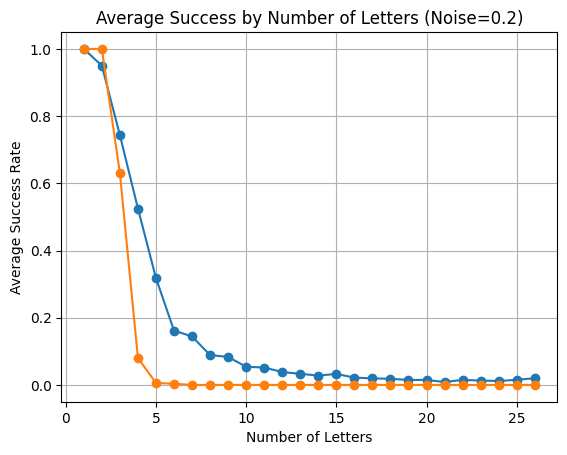

In [2]:
def average_success_rate(patterns, noise_percentage, max_epochs, iterations):
    success_rates = []
    for n in range(1, 27):
        avg_success_rate = 0
        for _ in range(iterations):
            results = test_hopfield_on_different_letter_number(patterns, noise_percentage, max_epochs, n)
            success_rate = sum(results.values()) / n
            avg_success_rate += success_rate
        avg_success_rate /= iterations
        success_rates.append(avg_success_rate)

    return success_rates

def average_success_rate_big(patterns_big, noise_percentage, max_epochs, iterations):
    success_rates = []
    for n in range(1, 27):
        avg_success_rate = 0
        for _ in range(iterations):
            results = test_hopfield_on_different_letter_number(patterns_big, noise_percentage, max_epochs, n)
            success_rate = sum(results.values()) / n
            avg_success_rate += success_rate
        avg_success_rate /= iterations
        success_rates.append(avg_success_rate)

    return success_rates

noise_percentage = 0.2
max_epochs = 10
iterations = 100

success_rates = average_success_rate(patterns, noise_percentage, max_epochs, iterations)
success_rates_big = average_success_rate_big(patterns_big, noise_percentage, max_epochs, iterations)


plt.plot(range(1, 27), success_rates, marker='o')
plt.plot(range(1, 27), success_rates_big, marker='o')
plt.title('Average Success by Number of Letters (Noise=0.2)')
plt.xlabel('Number of Letters')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()

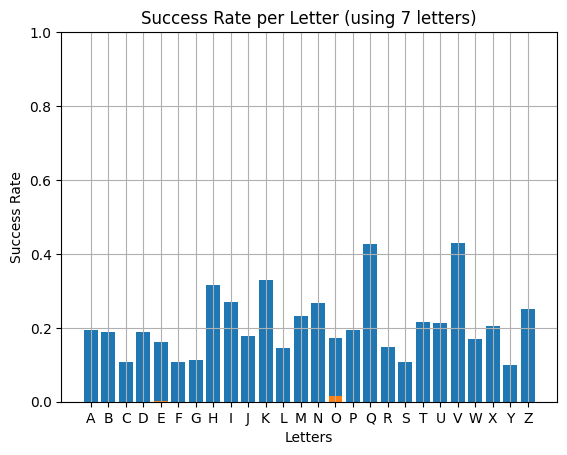

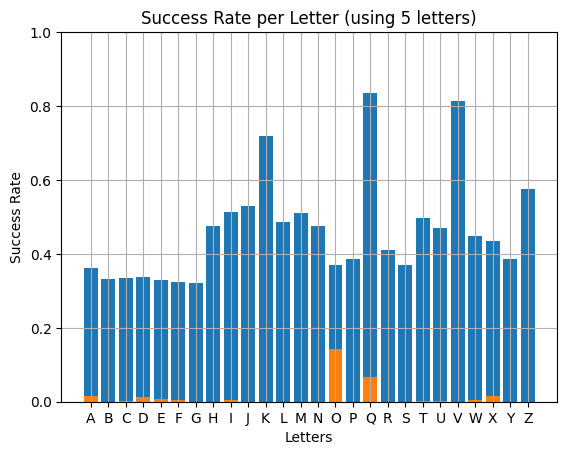

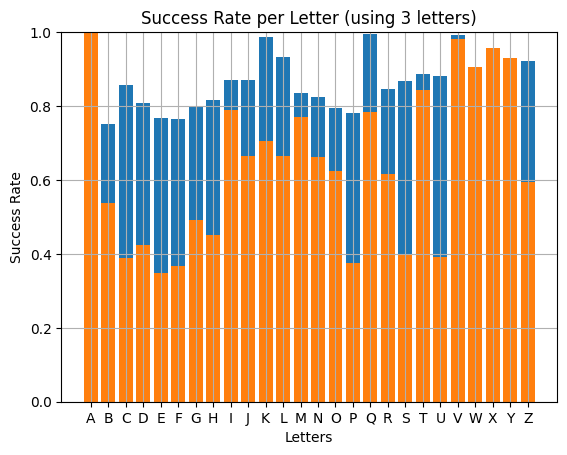

In [3]:

def success_rate_by_letter(patterns, noise_percentage, max_epochs, iterations, n):
    letter_success = {letter: 0 for letter in patterns.keys()}
    letter_selections = {letter: 0 for letter in patterns.keys()}
    
    for _ in range(iterations):
        selected_patterns = select_random_patterns(patterns, n)
        results = test_hopfield_on_different_letter_number(selected_patterns, noise_percentage, max_epochs, n)
        
        for letter in results:
            letter_selections[letter] += 1
            if results[letter]:
                letter_success[letter] += 1

    for letter in letter_success:
        if letter_selections[letter] > 0:  # Avoid division by zero
            letter_success[letter] /= letter_selections[letter]

    return letter_success

patterns= read_letters_from_file('letters.txt')
patterns_big = read_letters_from_file('letters_big_18x27.txt')
noise_percentage = 0.1
max_epochs = 10
iterations = 10000  
num_letters = 7

success_by_letter = success_rate_by_letter(patterns, noise_percentage, max_epochs, iterations, num_letters)
success_by_letter_big = success_rate_by_letter(patterns_big, noise_percentage, max_epochs, iterations, num_letters)


letters_big = list(success_by_letter_big.keys())
success_rates_big = list(success_by_letter_big.values())

letters = list(success_by_letter.keys())
success_rates = list(success_by_letter.values())

plt.bar(letters, success_rates)
plt.bar(letters_big, success_rates_big)
plt.title(f'Success Rate per Letter (using {num_letters} letters)')
plt.xlabel('Letters')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


num_letters = 5

success_by_letter = success_rate_by_letter(patterns, noise_percentage, max_epochs, iterations, num_letters)
success_by_letter_big = success_rate_by_letter(patterns_big, noise_percentage, max_epochs, iterations, num_letters)


letters_big = list(success_by_letter_big.keys())
success_rates_big = list(success_by_letter_big.values())

letters = list(success_by_letter.keys())
success_rates = list(success_by_letter.values())

plt.bar(letters, success_rates)
plt.bar(letters_big, success_rates_big)
plt.title(f'Success Rate per Letter (using {num_letters} letters)')
plt.xlabel('Letters')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

num_letters = 3 


success_by_letter = success_rate_by_letter(patterns, noise_percentage, max_epochs, iterations, num_letters)
success_by_letter_big = success_rate_by_letter(patterns_big, noise_percentage, max_epochs, iterations, num_letters)

letters_big = list(success_by_letter_big.keys())
success_rates_big = list(success_by_letter_big.values())

letters = list(success_by_letter.keys())
success_rates = list(success_by_letter.values())

plt.bar(letters, success_rates)
plt.bar(letters_big, success_rates_big)
plt.title(f'Success Rate per Letter (using {num_letters} letters)')
plt.xlabel('Letters')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

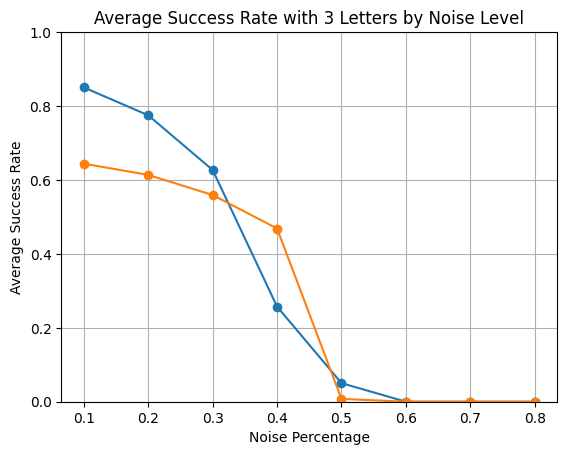

In [4]:
plt.show()
def average_success_rate_by_noise(patterns, num_letters, max_epochs, iterations, noise_range):
    success_rates = []
    
    for noise_percentage in noise_range:
        avg_success_rate = 0
        for _ in range(iterations):
            results = test_hopfield_on_different_letter_number(patterns, noise_percentage, max_epochs, num_letters)
            success_rate = sum(results.values()) / num_letters
            avg_success_rate += success_rate
        avg_success_rate /= iterations
        success_rates.append(avg_success_rate)

    return success_rates



patterns= read_letters_from_file('letters.txt')
patterns_big = read_letters_from_file('letters_big_18x27.txt')
max_epochs = 10
iterations = 1000
num_letters = 3
noise_range = np.arange(0.1, 0.9, 0.1)  

success_rates = average_success_rate_by_noise(patterns, num_letters, max_epochs, iterations, noise_range)
success_rates_big = average_success_rate_by_noise(patterns_big, num_letters, max_epochs, iterations, noise_range)

plt.plot(noise_range, success_rates, marker='o')
plt.plot(noise_range, success_rates_big, marker='o')
plt.title(f'Average Success Rate with {num_letters} Letters by Noise Level')
plt.xlabel('Noise Percentage')
plt.ylabel('Average Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from hopfield import read_letters_from_file, hopfield_model, add_noise



noise_percentage = 0.5
letters_to_train = ['K', 'Q', 'V', 'Z']
max_epochs = 10


patterns = read_letters_from_file('letters_big_18x27.txt')


selected_patterns = {letter: patterns[letter] for letter in letters_to_train}


noisy_patterns = {letter: add_noise(pattern, noise_percentage) for letter, pattern in selected_patterns.items()}

weight_matrix = hopfield_model(selected_patterns)


for letter, noisy_pattern in noisy_patterns.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the original letter on the left subplot
    plot_pattern_dynamic(selected_patterns[letter], ax1, f'Original {letter}')
    
    histories, energies = retrieve_pattern_dynamic(weight_matrix, noisy_pattern, max_epochs)
    max_frames = len(histories)

    def update(frame):
        ax2.clear()
        pattern = histories[frame]
        energy = energies[frame]
        plot_pattern_dynamic(pattern, ax2, f'{letter}', energy, frame)

    ani = animation.FuncAnimation(fig, update, frames=max_frames, repeat=False)
    ani.save(f'{letter}-Exp2_animation.gif', writer='pillow', fps=1)
    plt.close(fig)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from hopfield import read_letters_from_file, hopfield_model, add_noise



noise_percentage = 0.2
letters_to_train = ['K', 'Q', 'V', 'Z']
max_epochs = 10


patterns = read_letters_from_file('letters_big_18x27.txt')


selected_patterns = {letter: patterns[letter] for letter in letters_to_train}


noisy_patterns = {letter: add_noise(pattern, noise_percentage) for letter, pattern in selected_patterns.items()}

weight_matrix = hopfield_model(selected_patterns)


for letter, noisy_pattern in noisy_patterns.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the original letter on the left subplot
    plot_pattern_dynamic(selected_patterns[letter], ax1, f'Original {letter}')
    
    histories, energies = retrieve_pattern_dynamic(weight_matrix, noisy_pattern, max_epochs)
    max_frames = len(histories)

    def update(frame):
        ax2.clear()
        pattern = histories[frame]
        energy = energies[frame]
        plot_pattern_dynamic(pattern, ax2, f'{letter}', energy, frame)

    ani = animation.FuncAnimation(fig, update, frames=max_frames, repeat=False)
    ani.save(f'{letter}-Exp2_animation.gif', writer='pillow', fps=1)
    plt.close(fig)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from hopfield import read_letters_from_file, hopfield_model, add_noise



noise_percentage = 0.2
letters_to_train = ['F', 'G', 'S', 'Y']
max_epochs = 10


patterns = read_letters_from_file('letters_big_18x27.txt')


selected_patterns = {letter: patterns[letter] for letter in letters_to_train}


noisy_patterns = {letter: add_noise(pattern, noise_percentage) for letter, pattern in selected_patterns.items()}

weight_matrix = hopfield_model(selected_patterns)


for letter, noisy_pattern in noisy_patterns.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    plot_pattern_dynamic(selected_patterns[letter], ax1, f'Original {letter}')
    
    histories, energies = retrieve_pattern_dynamic(weight_matrix, noisy_pattern, max_epochs)
    max_frames = len(histories)

    def update(frame):
        ax2.clear()
        pattern = histories[frame]
        energy = energies[frame]
        plot_pattern_dynamic(pattern, ax2, f'{letter}', energy, frame)

    ani = animation.FuncAnimation(fig, update, frames=max_frames, repeat=False)
    ani.save(f'{letter}-Exp2-2_animation.gif', writer='pillow', fps=1)
    plt.close(fig)
